In [334]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("kc_house_data.csv")

In [335]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [336]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


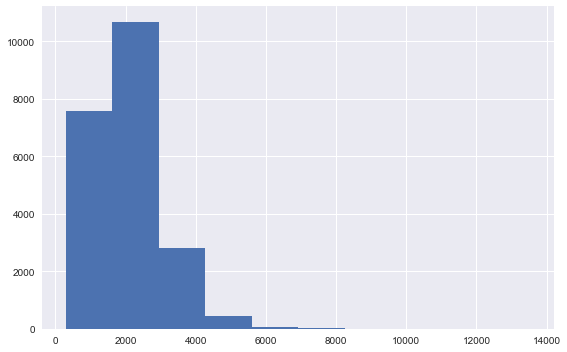

In [337]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
ax.hist(df.sqft_living)
plt.tight_layout()


In [338]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [339]:
df = df[['price','bedrooms','bathrooms','sqft_living','floors','view','grade','sqft_above','sqft_basement','sqft_living15','yr_built','yr_renovated','zipcode']]
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,sqft_living15,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,1.0,0,7,1180,0,1340,1955,0,98178
1,538000.0,3,2.25,2570,2.0,0,7,2170,400,1690,1951,1991,98125
2,180000.0,2,1.00,770,1.0,0,6,770,0,2720,1933,0,98028
3,604000.0,4,3.00,1960,1.0,0,7,1050,910,1360,1965,0,98136
4,510000.0,3,2.00,1680,1.0,0,8,1680,0,1800,1987,0,98074


540088.1417665294
367118.7031813722


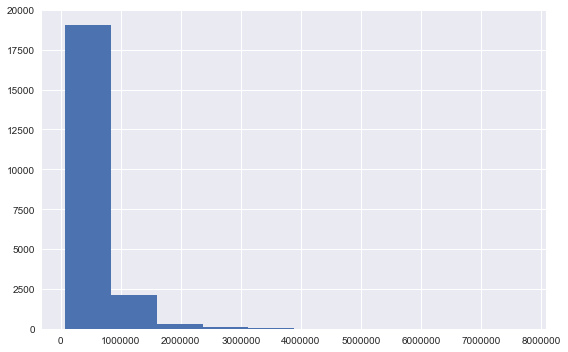

In [340]:
print(np.mean(df['price']))
print(np.std(df['price']))
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
plt.hist(df.price)
plt.tight_layout()

In [341]:
#Defining Age of house & dropping yr_built column
maximum = df[['yr_built','yr_renovated']].max(axis = 1)
df['Age'] = 2017 - maximum
df = df.drop('yr_built',1)

0        1955
1        1991
2        1933
3        1965
4        1987
5        2001
6        1995
7        1963
8        1960
9        2003
10       1965
11       1942
12       1927
13       1977
14       1900
15       1979
16       1994
17       1916
18       1921
19       1969
20       1947
21       1968
22       1995
23       1985
24       1985
25       1941
26       1915
27       1909
28       1948
29       2005
         ... 
21583    1943
21584    2007
21585    2009
21586    2009
21587    2006
21588    2007
21589    2010
21590    2007
21591    2014
21592    2008
21593    2006
21594    2008
21595    2006
21596    2014
21597    2007
21598    2014
21599    2003
21600    2008
21601    2008
21602    2014
21603    2003
21604    2014
21605    2014
21606    2009
21607    2008
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
dtype: int64


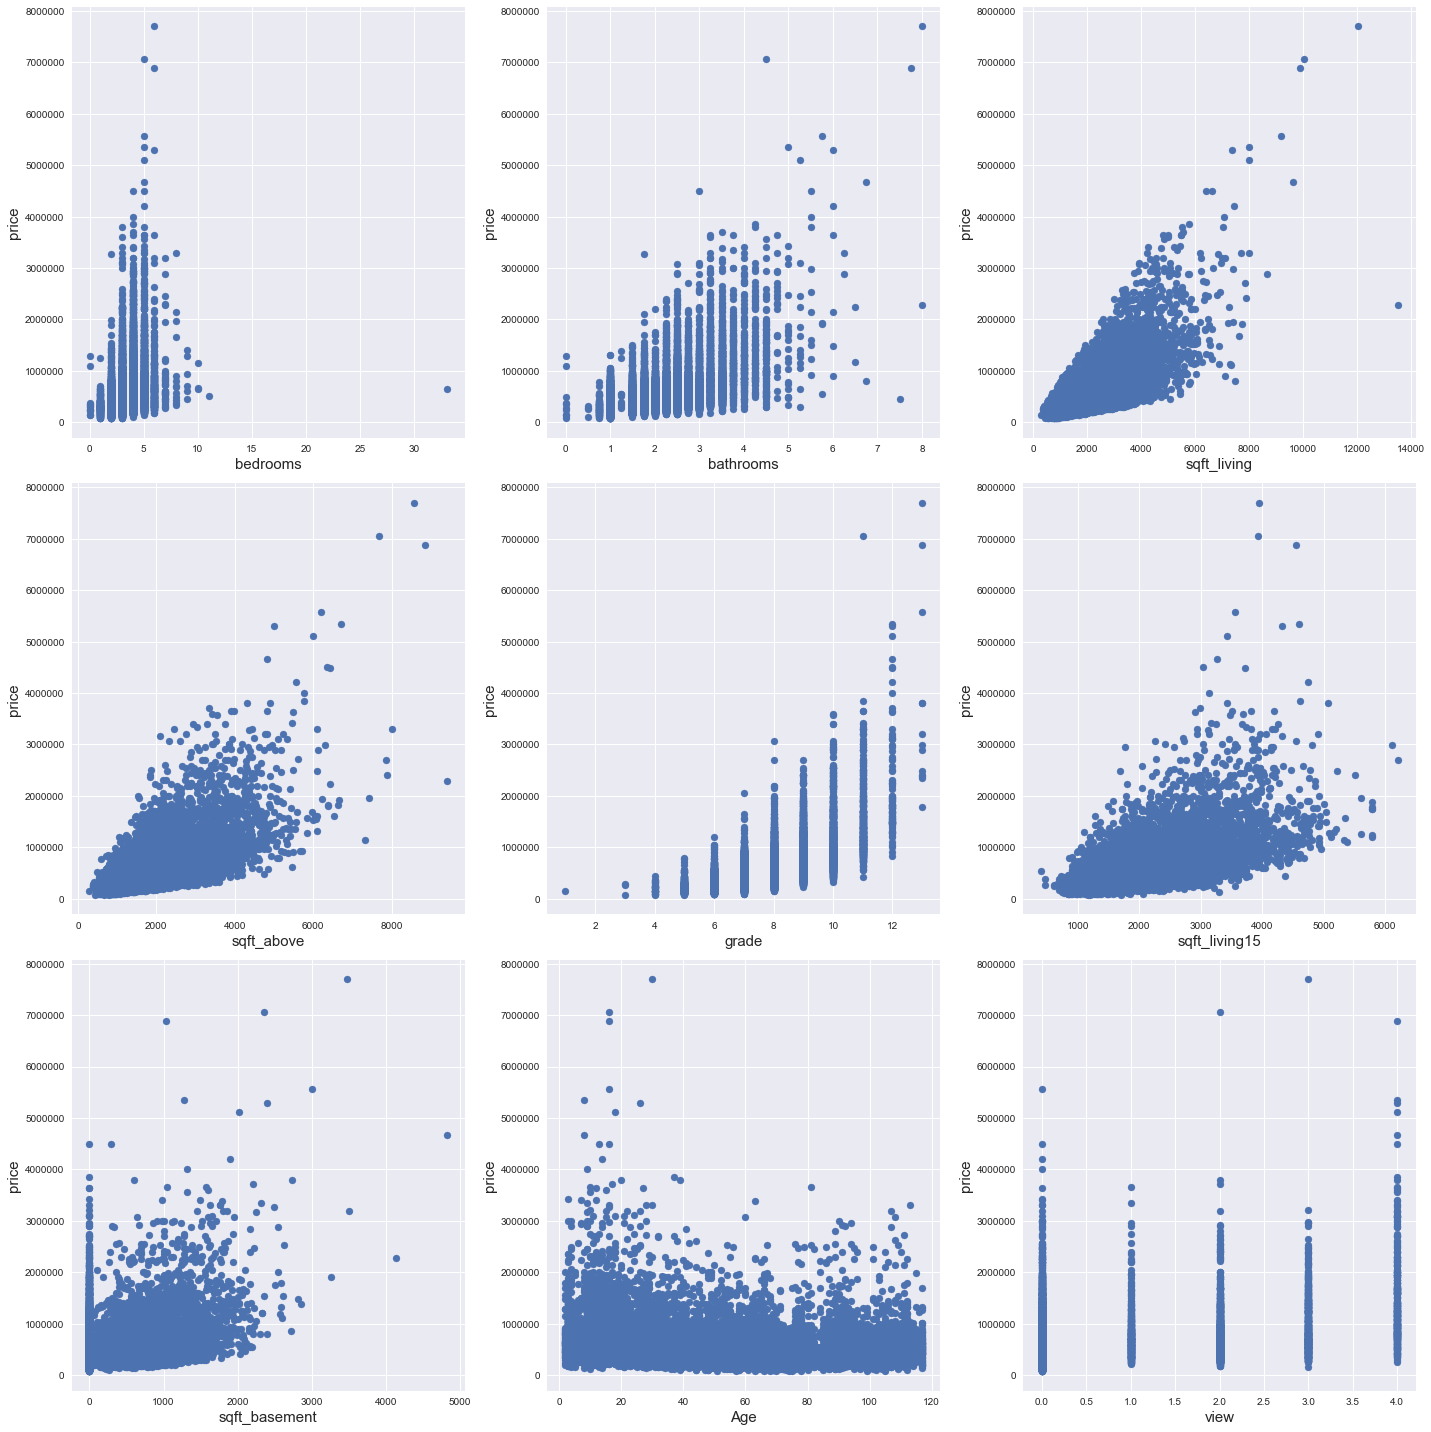

In [342]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(331)
ax1.scatter(df.bedrooms,df.price)
ax1.set_xlabel('bedrooms', fontsize = 15)
ax1.set_ylabel('price', fontsize = 15)

#2
ax2 = fig.add_subplot(332)
ax2.scatter(df.bathrooms,df.price)
ax2.set_xlabel('bathrooms', fontsize = 15)
ax2.set_ylabel('price', fontsize = 15)

#3
ax3 = fig.add_subplot(333)
ax3.scatter(df.sqft_living,df.price)
ax3.set_xlabel('sqft_living', fontsize = 15)
ax3.set_ylabel('price', fontsize = 15)

#4
ax4 = fig.add_subplot(334)
ax4.scatter(df.sqft_above,df.price)
ax4.set_xlabel('sqft_above', fontsize = 15)
ax4.set_ylabel('price', fontsize = 15)

#5
ax5 = fig.add_subplot(335)
ax5.scatter(df.grade,df.price)
ax5.set_xlabel('grade', fontsize = 15)
ax5.set_ylabel('price', fontsize = 15)

#6
ax6 = fig.add_subplot(336)
ax6.scatter(df.sqft_living15,df.price)
ax6.set_xlabel('sqft_living15', fontsize = 15)
ax6.set_ylabel('price', fontsize = 15)

#7
ax7 = fig.add_subplot(337)
ax7.scatter(df.sqft_basement,df.price)
ax7.set_xlabel('sqft_basement', fontsize = 15)
ax7.set_ylabel('price', fontsize = 15)

#8
ax8 = fig.add_subplot(338)
ax8.scatter(df.Age,df.price)
ax8.set_xlabel('Age', fontsize = 15)
ax8.set_ylabel('price', fontsize = 15)

#9
ax9 = fig.add_subplot(339)
ax9.scatter(df.view,df.price)
ax9.set_xlabel('view', fontsize = 15)
ax9.set_ylabel('price', fontsize = 15)


plt.tight_layout()

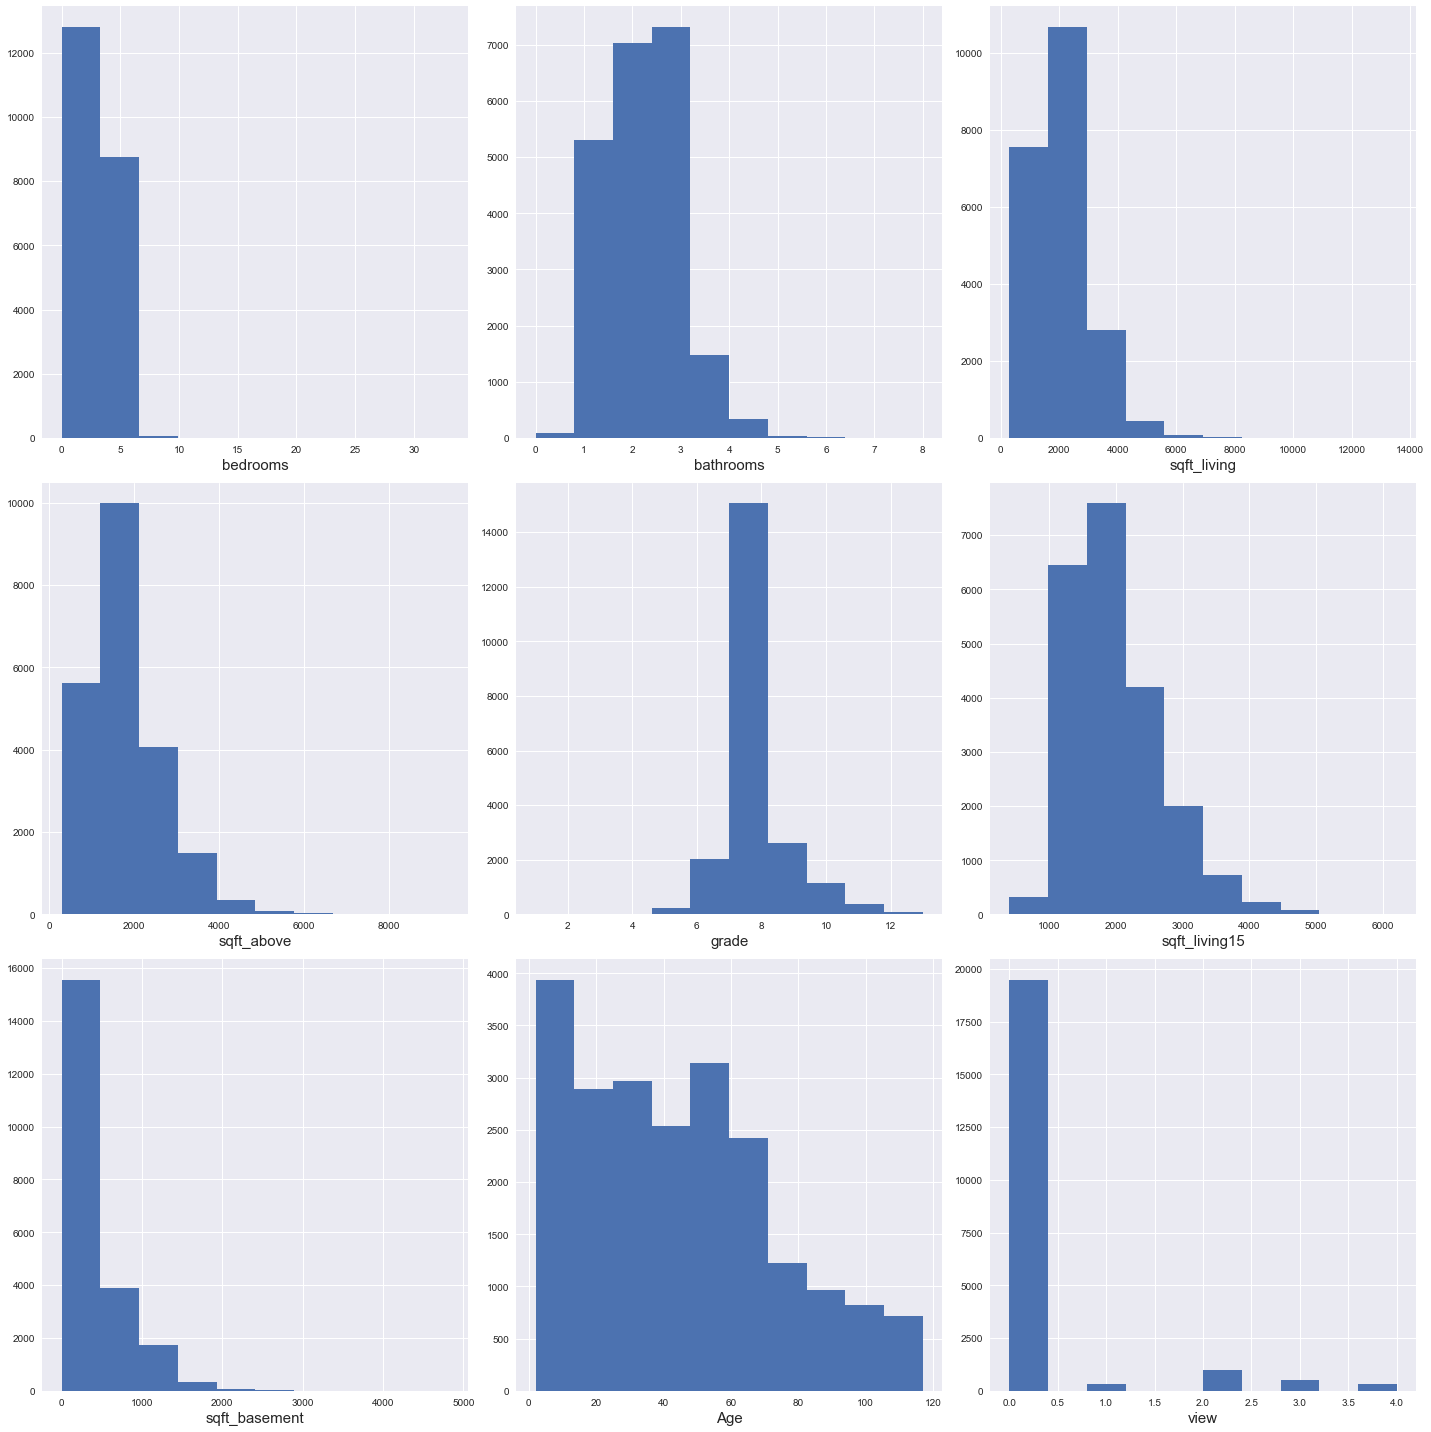

In [343]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(331)
ax1.hist(df.bedrooms)
ax1.set_xlabel('bedrooms', fontsize = 15)

#2
ax2 = fig.add_subplot(332)
ax2.hist(df.bathrooms)
ax2.set_xlabel('bathrooms', fontsize = 15)

#3
ax3 = fig.add_subplot(333)
ax3.hist(df.sqft_living)
ax3.set_xlabel('sqft_living', fontsize = 15)

#4
ax4 = fig.add_subplot(334)
ax4.hist(df.sqft_above)
ax4.set_xlabel('sqft_above', fontsize = 15)

#5
ax5 = fig.add_subplot(335)
ax5.hist(df.grade)
ax5.set_xlabel('grade', fontsize = 15)

#6
ax6 = fig.add_subplot(336)
ax6.hist(df.sqft_living15)
ax6.set_xlabel('sqft_living15', fontsize = 15)

#7
ax7 = fig.add_subplot(337)
ax7.hist(df.sqft_basement)
ax7.set_xlabel('sqft_basement', fontsize = 15)

#8
ax8 = fig.add_subplot(338)
ax8.hist(df.Age)
ax8.set_xlabel('Age', fontsize = 15)

#9
ax9 = fig.add_subplot(339)
ax9.hist(df.view)
ax9.set_xlabel('view', fontsize = 15)


plt.tight_layout()
fig.savefig('House_price_hist.png')

In [344]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,sqft_living15,yr_renovated,zipcode,Age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.234303,7.656873,1788.390691,291.509045,1986.552492,84.402258,98077.939805,43.613982
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.766318,1.175459,828.090978,442.575043,685.391304,401.679240,53.505026,28.806854
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,290.000000,0.000000,399.000000,0.000000,98001.000000,2.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,7.000000,1190.000000,0.000000,1490.000000,0.000000,98033.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,7.000000,1560.000000,0.000000,1840.000000,0.000000,98065.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,8.000000,2210.000000,560.000000,2360.000000,0.000000,98118.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,4.000000,13.000000,9410.000000,4820.000000,6210.000000,2015.000000,98199.000000,117.000000


In [345]:
#Converted Basement feature & Renovation to categorical variable and dropped the original

df['Basement_or_not'] =  df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['view_or_not'] = df['view'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop('sqft_basement',1)
df = df.drop('yr_renovated',1)
df = df.drop('view',1)

#Removed outliers from price
df =df[(df['price'] < 600000 ) & (df['price'] > 150000 )]

#Removed outliers from bedroom
df = df[(df.bedrooms <= 5) & (df.bedrooms >= 1)]

#Removed outliers from bathroom
df = df[(df.bathrooms < 4) & (df.bathrooms > 0)]

#Removed outliers from sqft_living
df = df[(df.sqft_living <= 4000) & (df.sqft_living > 500)]

#Removed outliers from sqft_above
df = df[df.sqft_above <= 4800]

#Removed outliers from sqft_living15
df = df[df.sqft_living15 <= 4000]

#Removed outliers from floors
df =df[df.floors <= 3]

#Removed outliers from grade
df = df[(df.grade > 5) & (df.grade < 12)]

#Removed outliers from Age
df = df[(df['Age'] < 100)]

#Increaseing weightage of bathroom compared to bedrooms
df['bath_new'] = df['bathrooms']*2
df = df.drop('bathrooms',1)

#Converting zipcode to catgegorical variables
df_zipcode = pd.get_dummies(df['zipcode'],drop_first = True).iloc[:,1:]
df = pd.concat([df,df_zipcode],axis =1)
df = df.drop('zipcode',axis = 1)


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14056 entries, 0 to 21612
Data columns (total 78 columns):
price              14056 non-null float64
bedrooms           14056 non-null int64
sqft_living        14056 non-null int64
floors             14056 non-null float64
grade              14056 non-null int64
sqft_above         14056 non-null int64
sqft_living15      14056 non-null int64
Age                14056 non-null int64
Basement_or_not    14056 non-null int64
view_or_not        14056 non-null int64
bath_new           14056 non-null float64
98003              14056 non-null uint8
98004              14056 non-null uint8
98005              14056 non-null uint8
98006              14056 non-null uint8
98007              14056 non-null uint8
98008              14056 non-null uint8
98010              14056 non-null uint8
98011              14056 non-null uint8
98014              14056 non-null uint8
98019              14056 non-null uint8
98022              14056 non-null uint8
98023

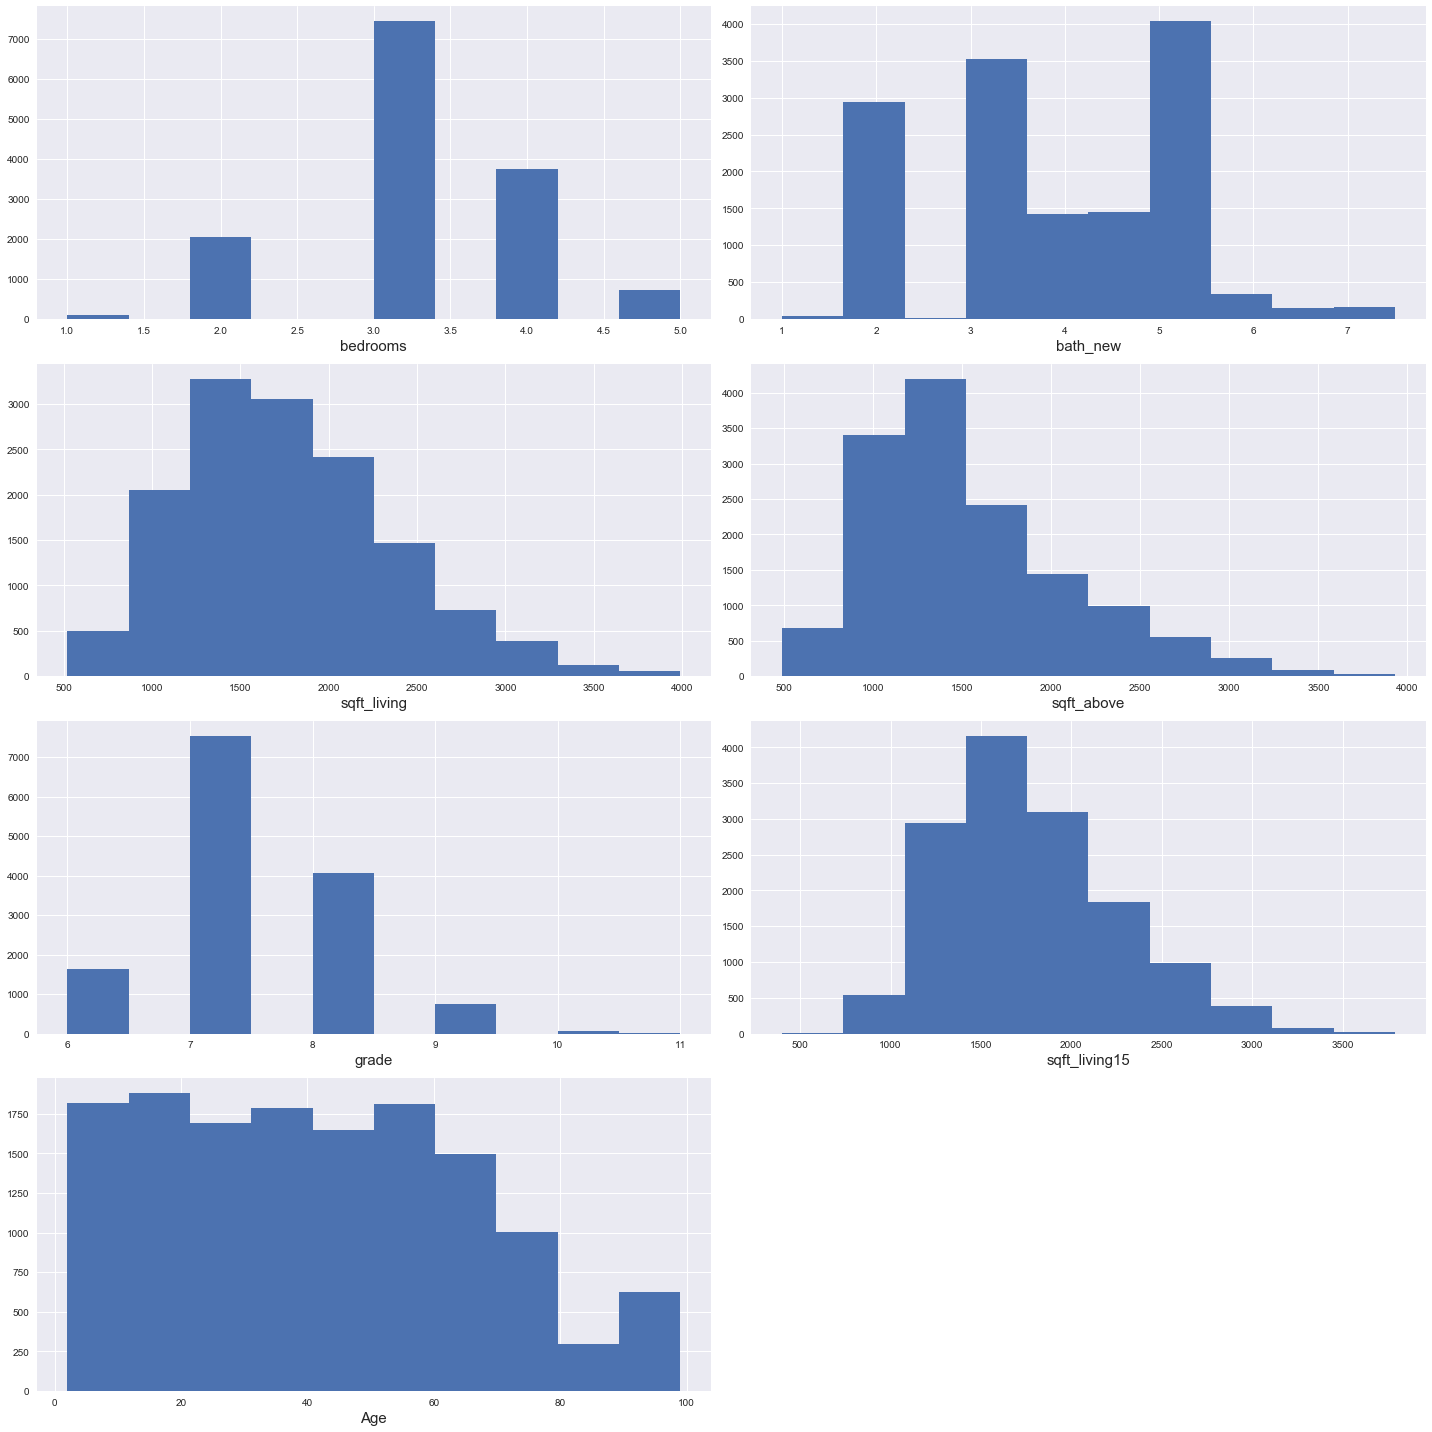

In [347]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(421)
ax1.hist(df.bedrooms)
ax1.set_xlabel('bedrooms', fontsize = 15)


#2
ax2 = fig.add_subplot(422)
ax2.hist(df.bath_new)
ax2.set_xlabel('bath_new', fontsize = 15)


#3
ax3 = fig.add_subplot(423)
ax3.hist(df.sqft_living)
ax3.set_xlabel('sqft_living', fontsize = 15)


#4
ax4 = fig.add_subplot(424)
ax4.hist(df.sqft_above)
ax4.set_xlabel('sqft_above', fontsize = 15)


#5
ax5 = fig.add_subplot(425)
ax5.hist(df.grade)
ax5.set_xlabel('grade', fontsize = 15)


#6
ax6 = fig.add_subplot(426)
ax6.hist(df.sqft_living15)
ax6.set_xlabel('sqft_living15', fontsize = 15)

#7
ax7 = fig.add_subplot(427)
ax7.hist(df.Age)
ax7.set_xlabel('Age', fontsize = 15)



plt.tight_layout()


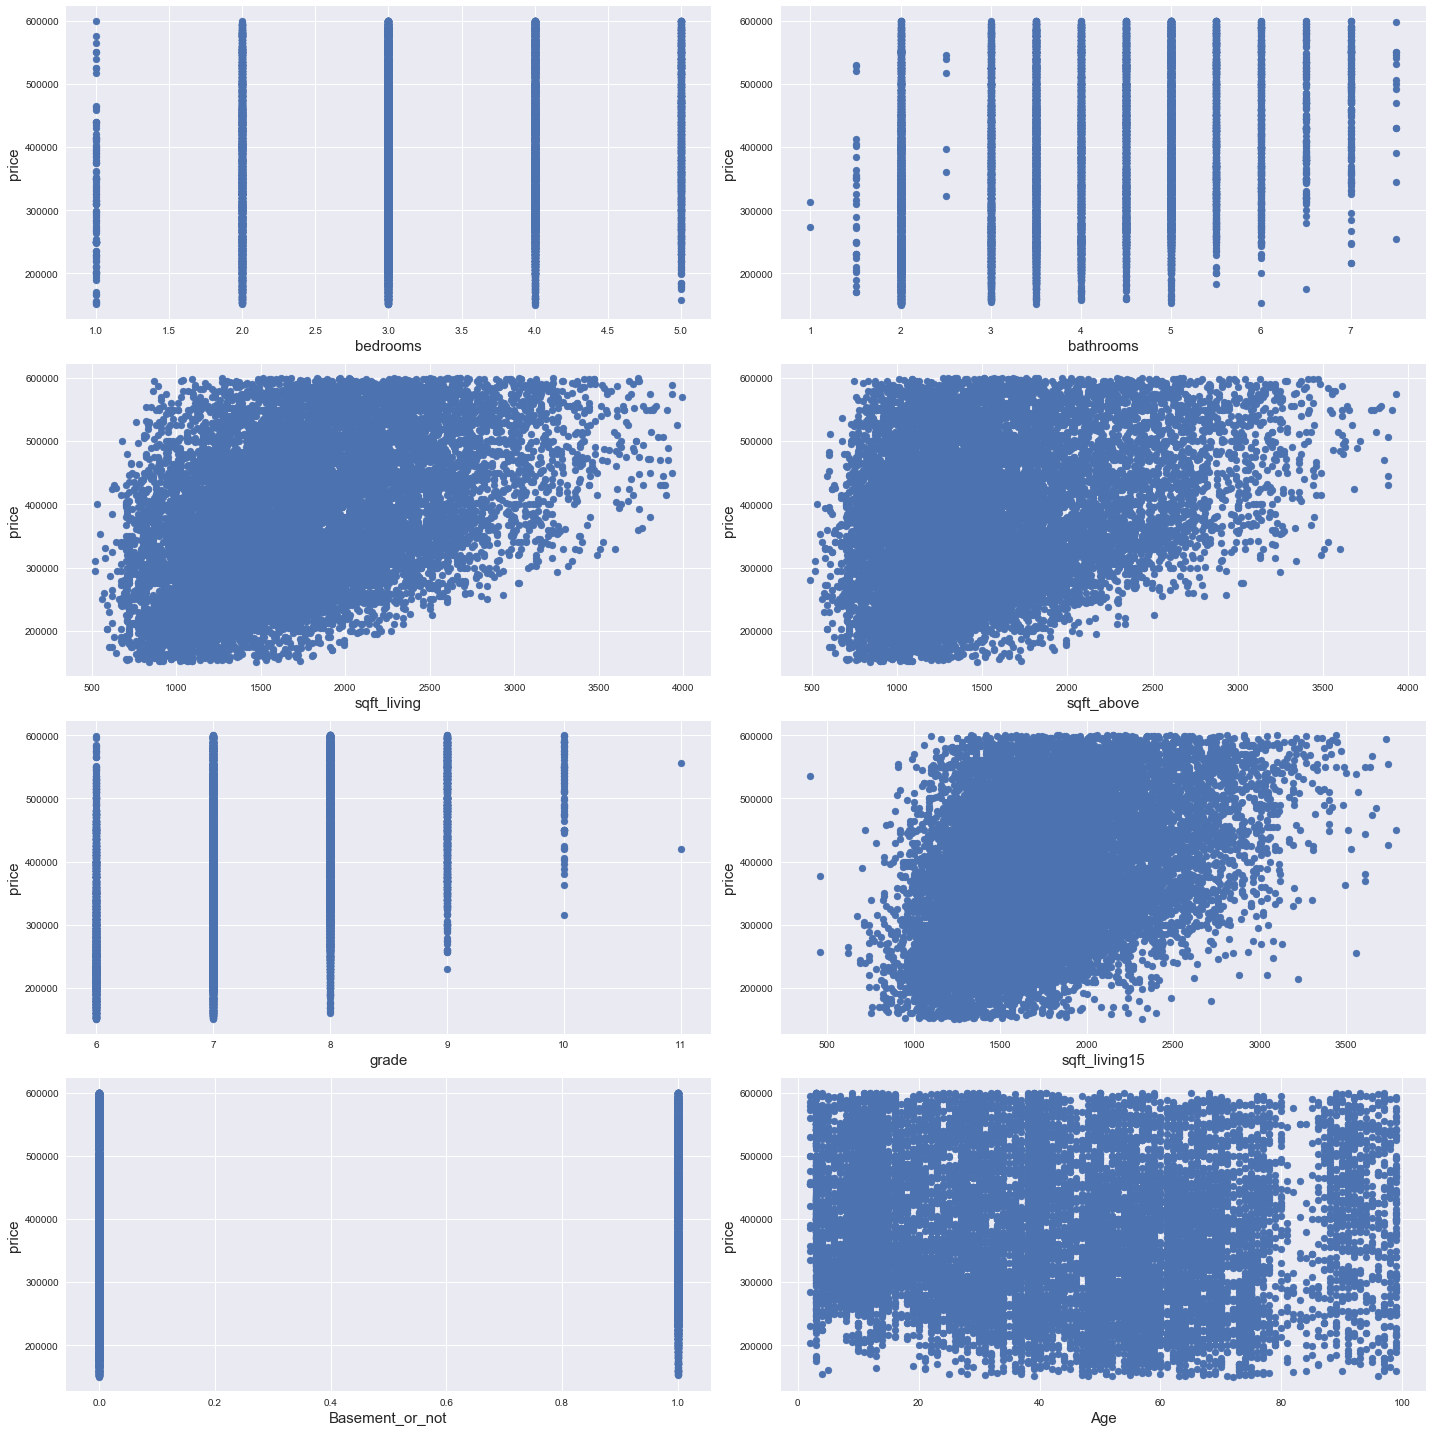

In [348]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(421)
ax1.scatter(df.bedrooms,df.price)
ax1.set_xlabel('bedrooms', fontsize = 15)
ax1.set_ylabel('price', fontsize = 15)

#2
ax2 = fig.add_subplot(422)
ax2.scatter(df.bath_new,df.price)
ax2.set_xlabel('bathrooms', fontsize = 15)
ax2.set_ylabel('price', fontsize = 15)

#3
ax3 = fig.add_subplot(423)
ax3.scatter(df.sqft_living,df.price)
ax3.set_xlabel('sqft_living', fontsize = 15)
ax3.set_ylabel('price', fontsize = 15)

#4
ax4 = fig.add_subplot(424)
ax4.scatter(df.sqft_above,df.price)
ax4.set_xlabel('sqft_above', fontsize = 15)
ax4.set_ylabel('price', fontsize = 15)

#5
ax5 = fig.add_subplot(425)
ax5.scatter(df.grade,df.price)
ax5.set_xlabel('grade', fontsize = 15)
ax5.set_ylabel('price', fontsize = 15)

#6
ax6 = fig.add_subplot(426)
ax6.scatter(df.sqft_living15,df.price)
ax6.set_xlabel('sqft_living15', fontsize = 15)
ax6.set_ylabel('price', fontsize = 15)

#7
ax7 = fig.add_subplot(427)
ax7.scatter(df.Basement_or_not,df.price)
ax7.set_xlabel('Basement_or_not', fontsize = 15)
ax7.set_ylabel('price', fontsize = 15)

#8
ax8 = fig.add_subplot(428)
ax8.scatter(df.Age,df.price)
ax8.set_xlabel('Age', fontsize = 15)
ax8.set_ylabel('price', fontsize = 15)



plt.tight_layout()

In [349]:
df.corr()

,price,bedrooms,sqft_living,floors,grade,sqft_above,sqft_living15,Age,Basement_or_not,view_or_not,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
price,1.000000,0.159813,0.405096,0.203667,0.438768,0.305539,0.369117,-0.104500,0.169267,0.118347,...,-0.070856,-0.055949,-0.010147,-0.014231,-0.148122,0.057623,-0.106915,-0.079091,-0.113765,0.085244
bedrooms,0.159813,1.000000,0.600168,0.093052,0.247639,0.456468,0.377025,-0.163601,0.129496,0.014650,...,-0.010661,-0.004182,0.000531,0.017854,-0.023760,-0.001476,0.011823,0.020746,0.002668,-0.068453
sqft_living,0.405096,0.600168,1.000000,0.258929,0.566222,0.806390,0.697133,-0.351460,0.189726,0.107701,...,-0.042824,-0.017956,-0.039524,0.010979,-0.053120,-0.001915,-0.013991,0.002349,-0.009335,-0.052626
floors,0.203667,0.093052,0.258929,1.000000,0.426551,0.485091,0.201596,-0.605426,-0.298995,-0.044495,...,-0.049373,-0.026212,-0.077743,-0.055976,-0.063602,-0.044889,-0.058544,-0.034762,-0.050510,0.010101
grade,0.438768,0.247639,0.566222,0.426551,1.000000,0.578174,0.553083,-0.514456,-0.002204,0.067676,...,-0.084999,-0.023489,-0.058270,-0.029379,-0.116122,0.011982,-0.082376,-0.027805,-0.035152,-0.003101
sqft_above,0.305539,0.456468,0.806390,0.485091,0.578174,1.000000,0.659062,-0.469206,-0.341354,0.025156,...,-0.044466,-0.009087,-0.056352,-0.010262,-0.063108,-0.019641,-0.054176,-0.009097,-0.017064,-0.066422
sqft_living15,0.369117,0.377025,0.697133,0.201596,0.553083,0.659062,1.000000,-0.338405,0.009869,0.134120,...,-0.081557,-0.025226,-0.046052,-0.006507,-0.076445,0.015799,-0.038380,-0.022260,-0.022575,-0.036241
Age,-0.104500,-0.163601,-0.351460,-0.605426,-0.514456,-0.469206,-0.338405,1.000000,0.149442,0.060377,...,0.070906,0.029200,0.099284,0.074845,0.103490,0.061802,0.091536,0.029946,0.029814,0.030711
Basement_or_not,0.169267,0.129496,0.189726,-0.298995,-0.002204,-0.341354,0.009869,0.149442,1.000000,0.107292,...,-0.001152,-0.013423,0.013697,0.022228,0.014628,0.033090,0.036975,0.003206,0.000235,0.063132
view_or_not,0.118347,0.014650,0.107701,-0.044495,0.067676,0.025156,0.134120,0.060377,0.107292,1.000000,...,0.002830,-0.013123,-0.013687,0.079855,-0.025186,0.017121,0.082749,0.002383,0.105373,-0.003275


In [350]:
X = df.iloc[:,1:]
X.head()

,bedrooms,sqft_living,floors,grade,sqft_above,sqft_living15,Age,Basement_or_not,view_or_not,bath_new,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1180,1.0,7,1180,1340,62,0,0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,3,2570,2.0,7,2170,1690,26,1,0,4.5,...,0,0,0,0,0,0,0,0,0,0
2,2,770,1.0,6,770,2720,84,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,3,1680,1.0,8,1680,1800,30,0,0,4.0,...,0,0,0,0,0,0,0,0,0,0
6,3,1715,2.0,7,1715,2238,22,0,0,4.5,...,0,0,0,0,0,0,0,0,0,0


In [351]:
y = df[['price']]
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
4,510000.0
6,257500.0


In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8, random_state = 0)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((11244, 77), (2812, 77), (11244, 1), (2812, 1))

In [353]:
lassoreg = Lasso()
lassoreg.fit(X_train, y_train)
y_pred_lasso = lassoreg.predict(X_test)

In [354]:
from sklearn.metrics import mean_squared_error
RMSE_lasso_test = mean_squared_error(y_test,y_pred_lasso)**0.5
print(RMSE_lasso_test)

55907.9601265


In [355]:
from sklearn.metrics import r2_score
R_squared = r2_score(y_test,y_pred_lasso)
R_squared

0.75560195336078384

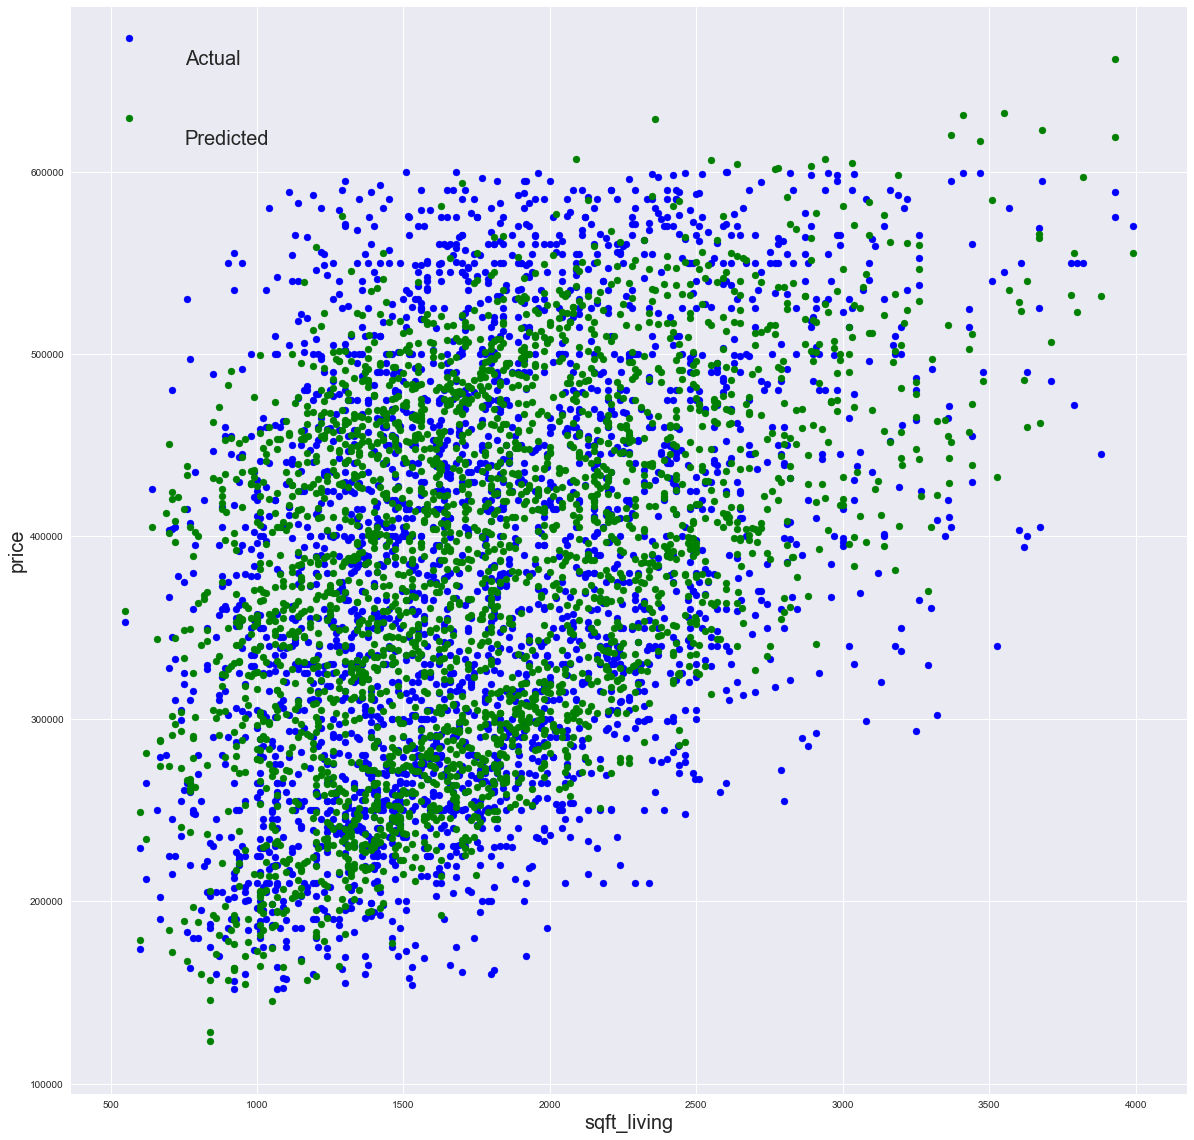

In [358]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.scatter(X_test['sqft_living'],y_test,color='blue',label = 'Actual')
ax.scatter(X_test['sqft_living'],y_pred_lasso,color='green',label = 'Predicted')
ax.set_xlabel('sqft_living', fontsize = 20)
ax.set_ylabel('price', fontsize = 20)
ax.legend(loc = "upper left",markerscale=1,handlelength = 4,handleheight = 5,prop={'size':20} )
plt.show()

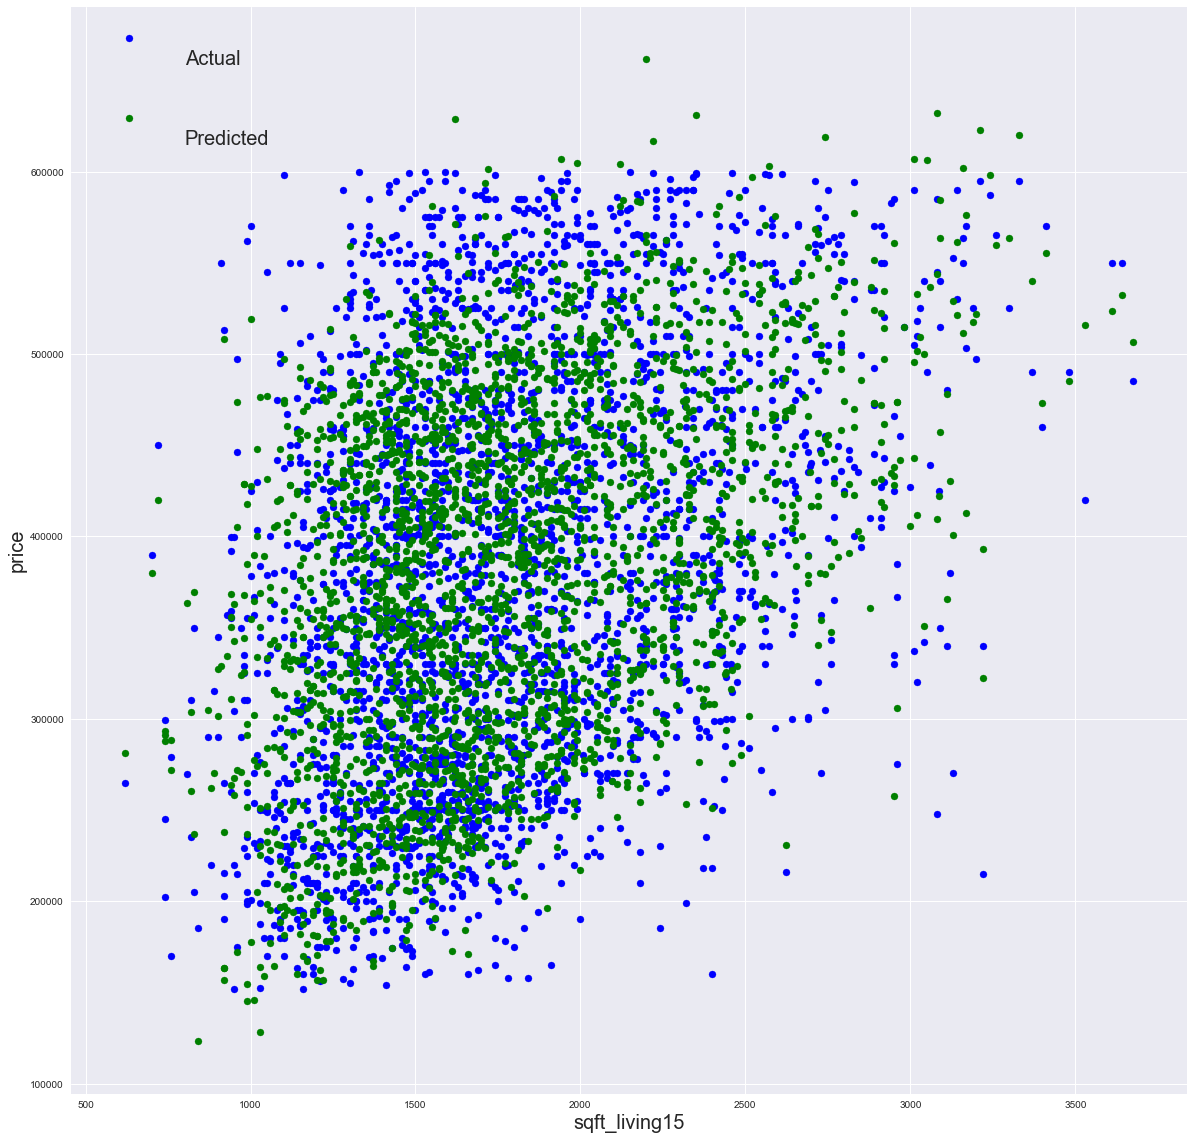

In [359]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.scatter(X_test['sqft_living15'],y_test,color='blue',label = 'Actual')
ax.scatter(X_test['sqft_living15'],y_pred_lasso,color='green',label = 'Predicted')
ax.set_xlabel('sqft_living15', fontsize = 20)
ax.set_ylabel('price', fontsize = 20)
ax.legend(loc = "upper left",markerscale=1,handlelength = 4,handleheight = 5,prop={'size':20} )
plt.show()

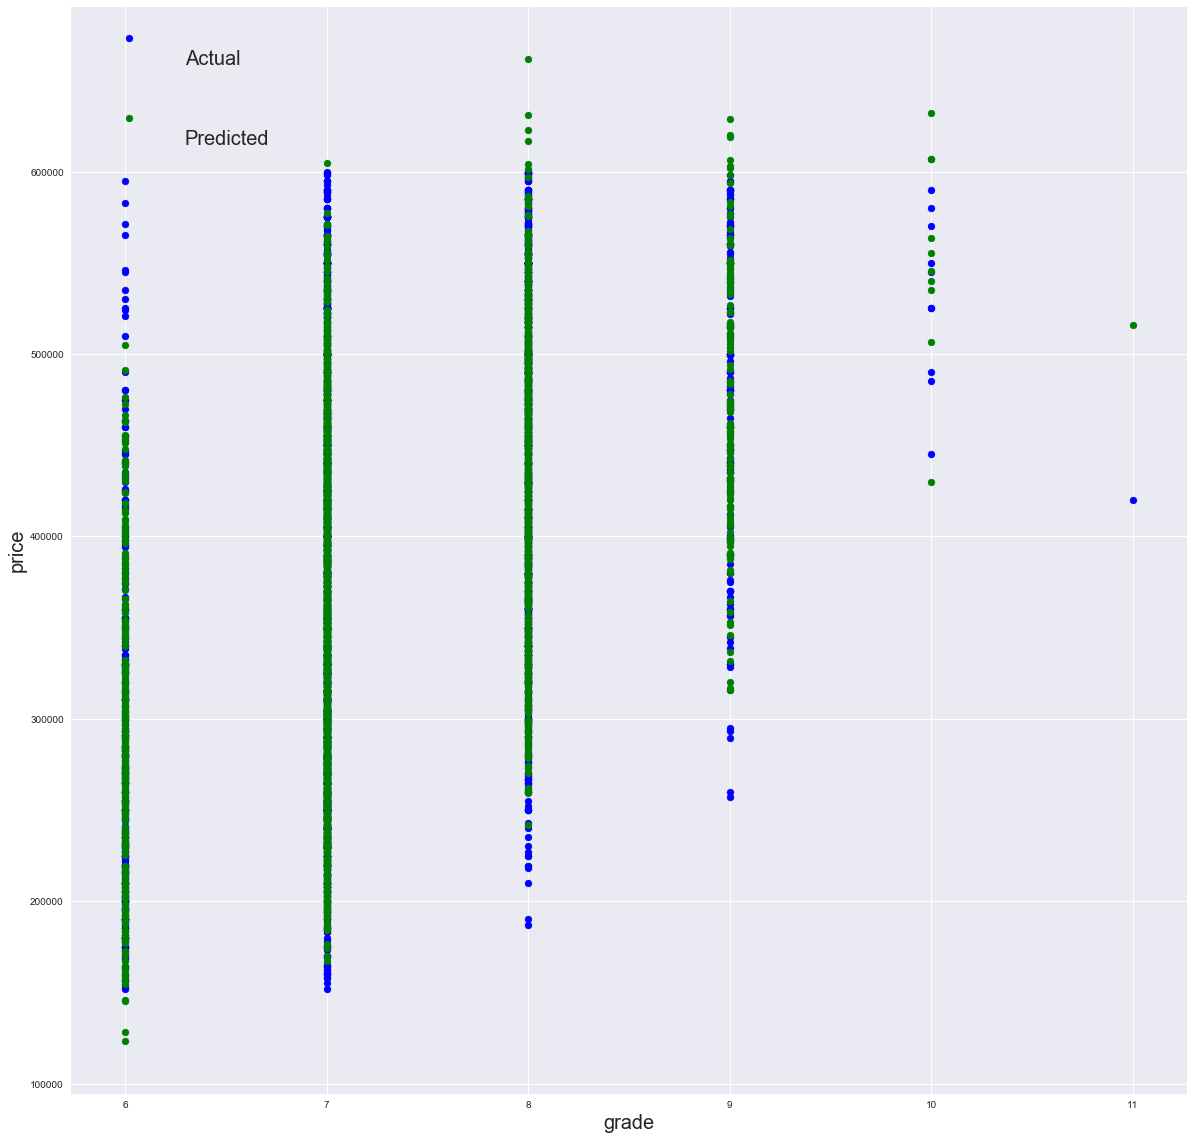

In [361]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.scatter(X_test['grade'],y_test,color='blue',label = 'Actual')
ax.scatter(X_test['grade'],y_pred_lasso,color='green',label = 'Predicted')
ax.set_xlabel('grade', fontsize = 20)
ax.set_ylabel('price', fontsize = 20)
ax.legend(loc = "upper left",markerscale=1,handlelength = 4,handleheight = 5,prop={'size':20} )
plt.show()

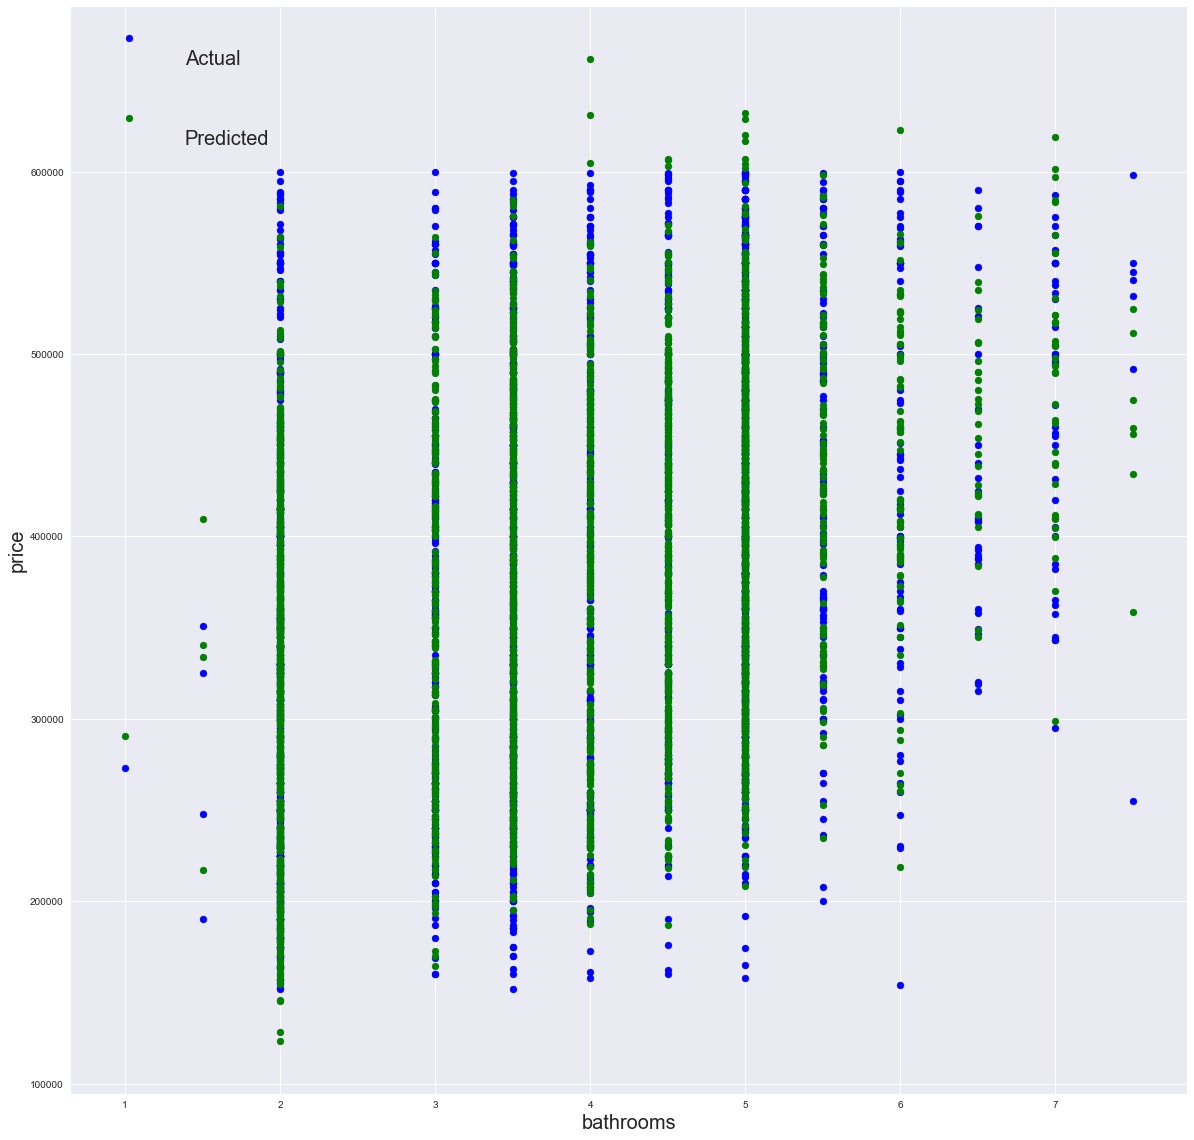

In [362]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.scatter(X_test['bath_new'],y_test,color='blue',label = 'Actual')
ax.scatter(X_test['bath_new'],y_pred_lasso,color='green',label = 'Predicted')
ax.set_xlabel('bathrooms', fontsize = 20)
ax.set_ylabel('price', fontsize = 20)
ax.legend(loc = "upper left",markerscale=1,handlelength = 4,handleheight = 5,prop={'size':20} )
plt.show()